In [171]:
#Import the three csv files
import pandas as pd
df1 = pd.read_csv('malaria_deaths.csv')
df2 = pd.read_csv('malaria_deaths_age.csv')
df3 = pd.read_csv('malaria_inc.csv')
#Drop unnecessary columns
df2  = df2.drop(columns = ['Unnamed: 0'])

In [172]:
# Change the column names 
df1.columns = ['Country', 'Code', 'Year', 'Death Rate Per 100,000']
df3.columns = ['Country', 'Code', 'Year', 'Incidents of Malaria Per 1,000']
df2.columns = ['Country', 'Code', 'Year', 'Age Group', 'Total Deaths']

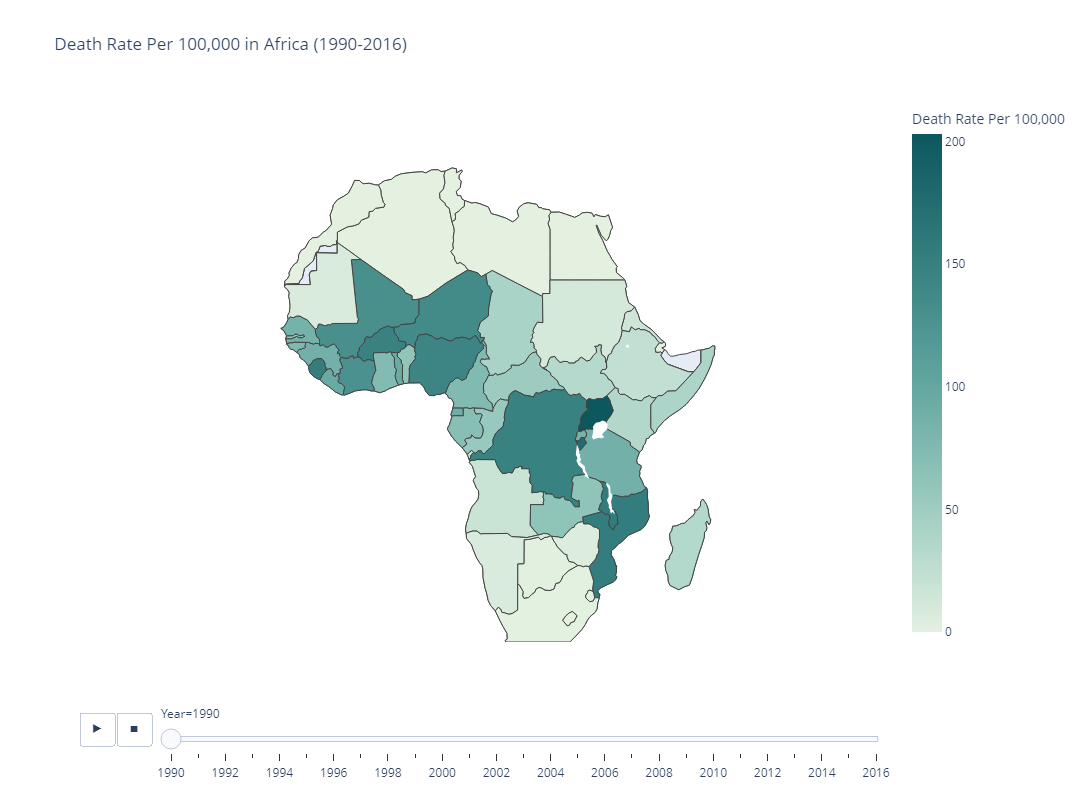

In [102]:
# Death Rate Per 100000 in Africa (1990-2016)
import plotly.express as px
import geopandas as gpd

fig = px.choropleth(df1,
                    locations='Code',
                    color = "Death Rate Per 100,000",
                    hover_name="Country",
                    animation_frame = 'Year',
                    scope = 'africa',
                    title = " Death Rate Per 100,000 in Africa (1990-2016)",
                    width = 800,
                    height = 800,
                    color_continuous_scale=px.colors.sequential.Mint)
fig.show()

In [99]:
df3.head()

,Country,Code,Year,"Incidents of Malaria Per 1,000"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


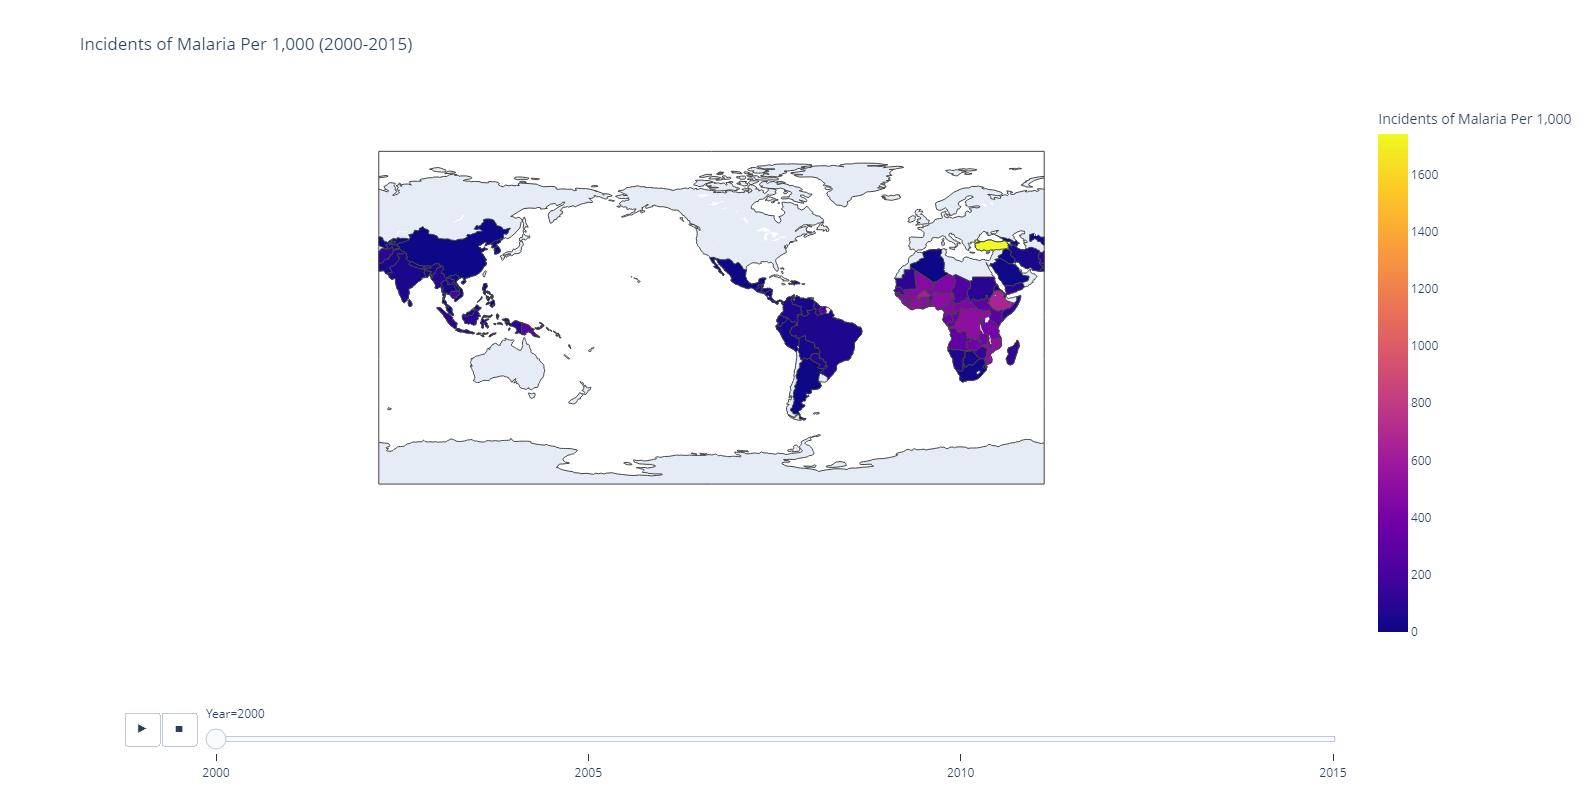

In [156]:
# Incidents of Malaria Per 1,000 (2000-2015)
import plotly.express as px
import geopandas as gpd

fig2 = px.choropleth(df3,
                    locations='Code',
                    color = "Incidents of Malaria Per 1,000",
                    hover_name="Country",
                    animation_frame = 'Year',
                    scope = 'world',
                    title = "Incidents of Malaria Per 1,000 (2000-2015)",
                    width = 1000,
                    height = 800,
                    color_continuous_scale=px.colors.sequential.Plasma)
fig2.show()

In [173]:
# Calculate the mean total deaths by age grou
df2 = df2.groupby(by = ['Year', 'Age Group']).mean()

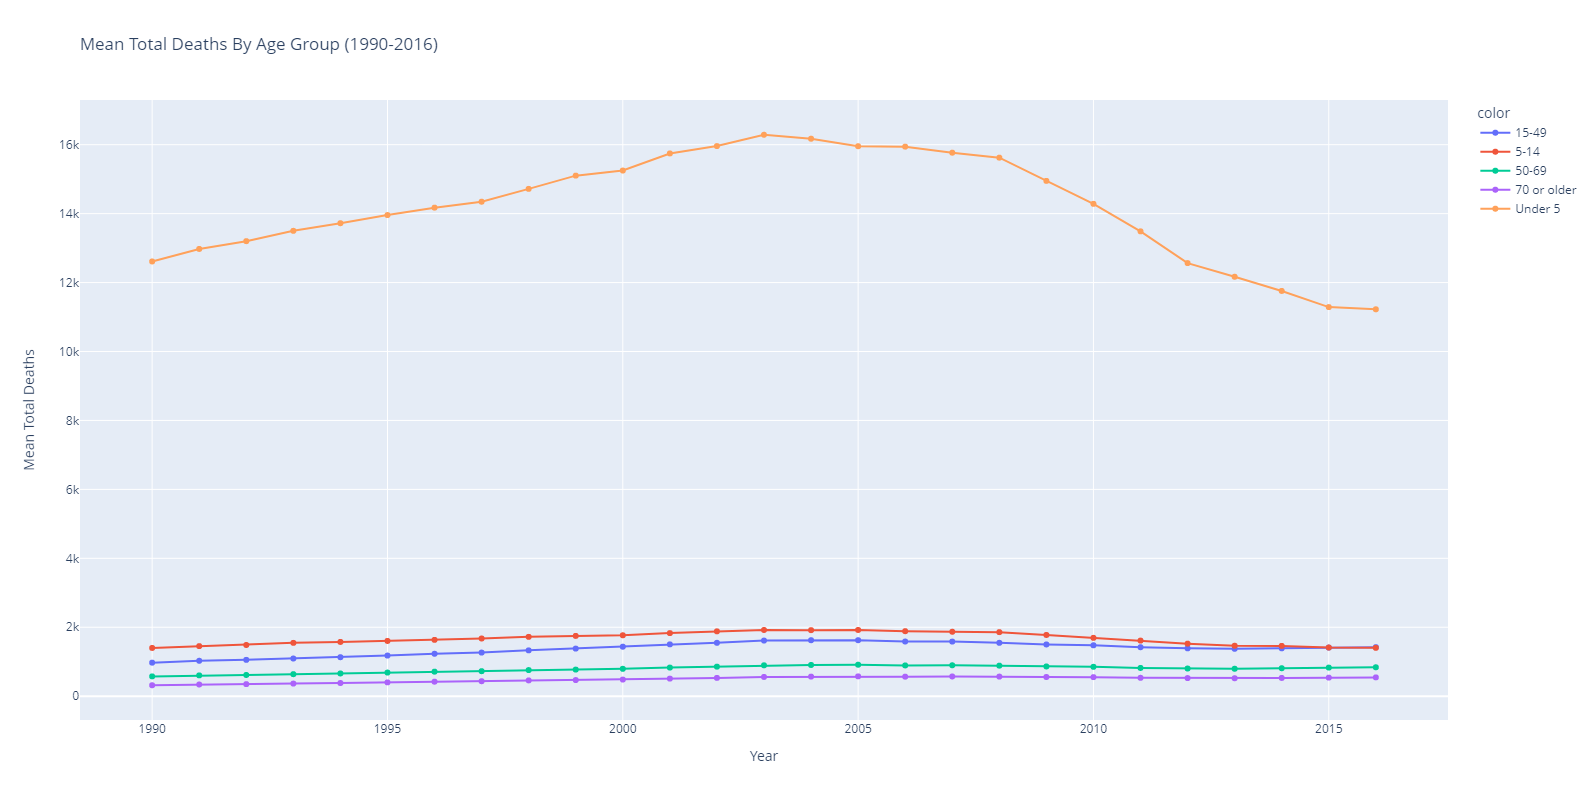

In [182]:
# Mean Total Deaths By Age Group
import plotly.express as px
fig = px.line(df2, x=df2.index.get_level_values(0), y="Total Deaths", color = df2.index.get_level_values(1), width = 1000, 
              title = 'Mean Total Deaths By Age Group (1990-2016)', labels = {'x': 'Year', 'Total Deaths': 'Mean Total Deaths'}, height = 800,markers = True)
fig.show()